# **Introduction**

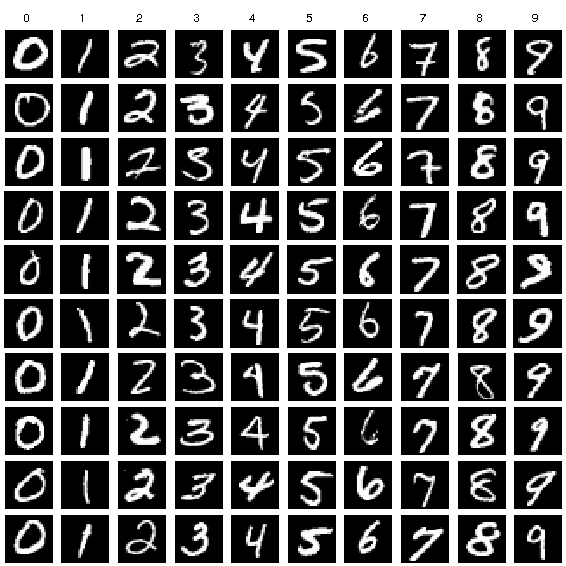

**Project Overview**
* This project focuses on one of the fundamental problems in the field of computer vision: Handwritten Digit Recognition. Specifically, using the MNIST dataset, which is frequently used to showcase the image processing capabilities of machine learning and deep learning models, we aimed to develop a model that accurately classifies handwritten digits from 0 to 9.

**About the Dataset**
* The MNIST dataset consists of 60,000 training and 10,000 test images of grayscale handwritten digits, each sized 28x28 pixels. This dataset provides an excellent starting point for beginners to implement and test deep learning models. The main goal of the project was to process this visual data and build a robust Convolutional Neural Network (CNN) model capable of distinguishing between different digit classes with high accuracy.

# **Import Necessary Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import os
import subprocess
import signal

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [5]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.2


In [6]:
mode = os.environ.get("RUN_MODE", "gpu")

if mode == "cpu":
    tf.config.set_visible_devices([], 'GPU')
    print("Running on CPU")
else:
    print("Running on GPU")

print("Available GPUs:", tf.config.list_physical_devices('GPU'))


Running on GPU
Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# **Load the Dataset**

In [7]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# **Understand And Organize the Datase**

In [8]:
# Check data types
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}\n")

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(x_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


***How many different label values do we have?***

In [9]:
num_labels = len(np.unique(y_train))
num_labels

10

## **Frequency Distribution of Target Labels y_train and y_test**

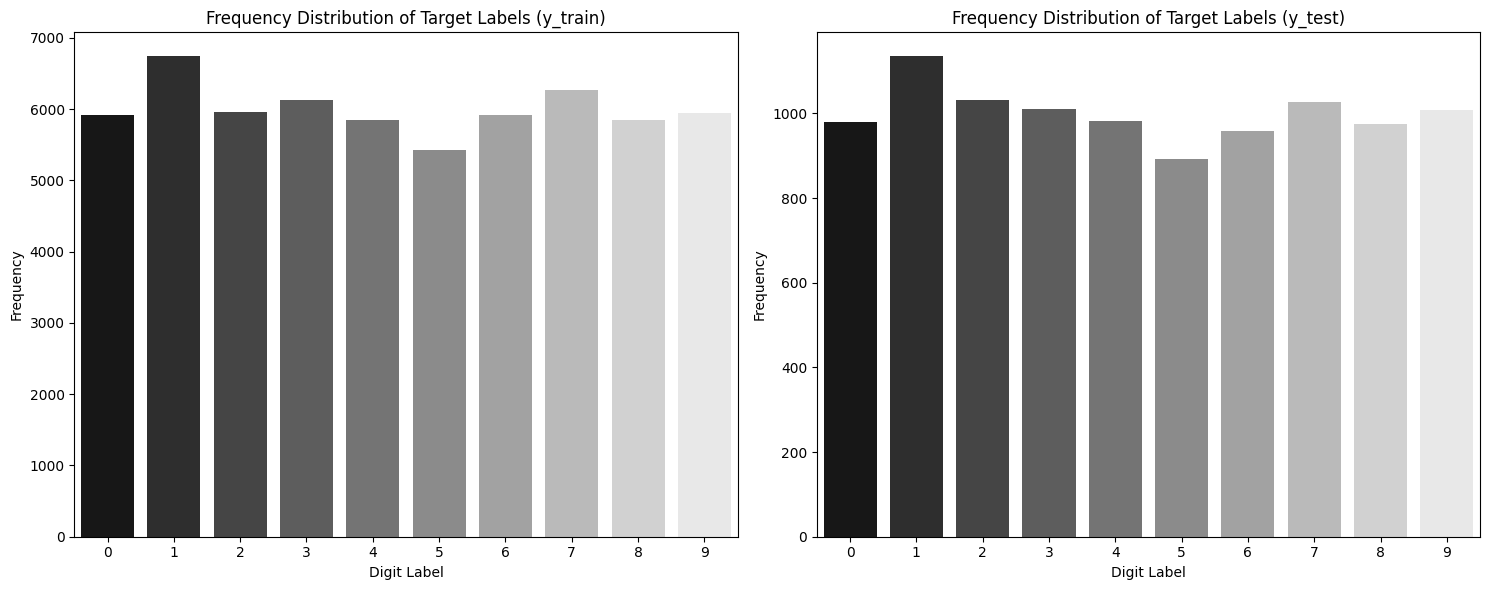

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x=y_train, palette='gray', ax=axes[0])
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')

sns.countplot(x=y_test, palette='gray', ax=axes[1])
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## **Visualization of Some Digits and Their Labels**

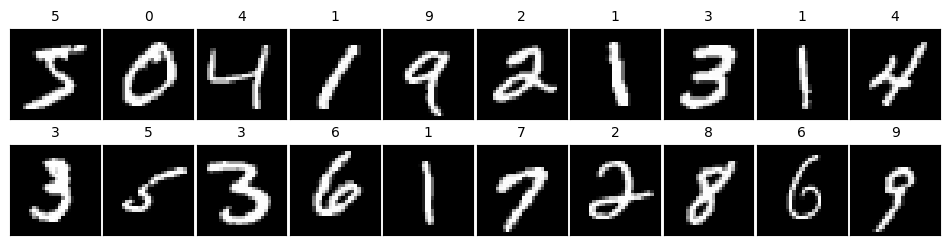

In [11]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01}, 
                             squeeze=True)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)
        
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

## **Visualizing an Image with Pixel Values**

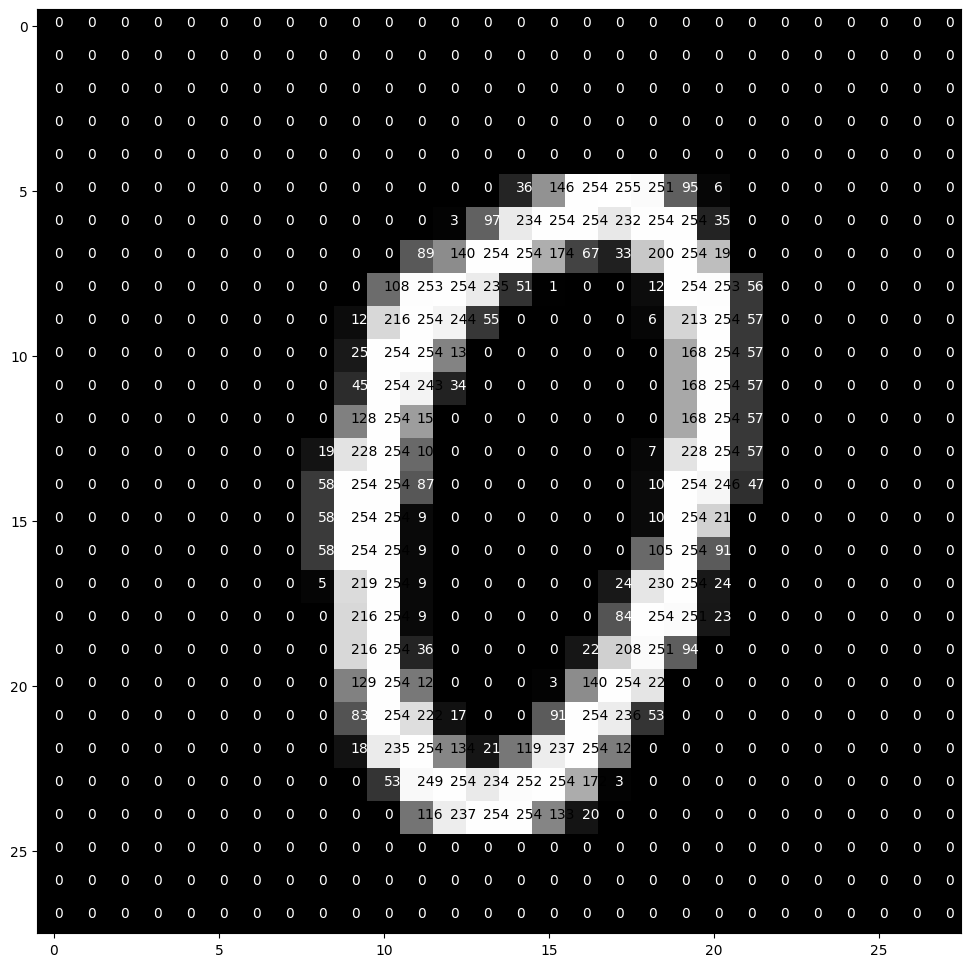

In [12]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")
    width, height = img.shape
    threshold = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y,x), 
                       color='white' if img [x][y]<threshold else 'black')

pixel_visualize(x_train[1000])

##  **Preprocessing**

In [13]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

**to_categorical** converts labels to one-hot encoding, allowing the neural network model to generate probabilities for each class and predict the correct class. This is especially necessary when working with a softmax layer in classification problems.

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


**reshape** is used to convert the input data into the shape that a Convolutional Neural Network expects: (samples, height, width, channels). Since MNIST images are grayscale, the number of channels is 1. After reshaping, the input shape becomes (60000, 28, 28, 1) for training and (10000, 28, 28, 1) for testing.

In [17]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

These lines **normalize** the pixel values by converting them from the range [0, 255] to [0, 1]. This helps the neural network train faster and more efficiently. The astype('float32') ensures the data is in the correct format for computation, as dividing integers directly could lead to incorrect results.

# **Model Building**

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

2026-02-12 20:42:28.573839: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2026-02-12 20:42:28.573872: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2026-02-12 20:42:28.573877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 14.04 GB
2026-02-12 20:42:28.573908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-12 20:42:28.573915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892,266 (3.40 MB)

 Trainable params: 891,050 (3.40 MB)

 Non-trainable params: 1,216 (4.75 KB)

## **Using ImageDataGenerator**

In [20]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(x_train)

## **Detecting the Correct File Name for EnergiBridge**

In [21]:
output_dir = "gpu_runs" if mode == "gpu" else "cpu_runs"
os.makedirs(output_dir, exist_ok=True)

In [22]:
existing_files = [
    f for f in os.listdir(output_dir)
    if f.startswith("run_") and f.endswith(".csv")
]

run_number = len(existing_files) + 1
filename = f"run_{run_number:02d}.csv"

output_path = os.path.join(output_dir, filename)

## **Running the Model with EnergiBridge**

In [23]:
energibridge_path = os.path.abspath("EnergiBridge/target/release/energibridge")
energy_process = subprocess.Popen(
    [energibridge_path, "-o", output_path, "--summary", "sleep", "9999"],  # Dummy long sleep
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

history = model.fit(datagen.flow(x_train, y_train, batch_size=512), epochs=10,
                    validation_data=(x_test, y_test))

energy_process.send_signal(signal.SIGINT)
energy_process.wait()

Epoch 1/10


2026-02-12 20:42:29.896510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.6658 - loss: 1.1081 - precision: 0.7502 - recall: 0.6070 - val_accuracy: 0.1135 - val_loss: 5.2853 - val_precision: 0.1135 - val_recall: 0.1135
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8764 - loss: 0.3968 - precision: 0.9054 - recall: 0.8527 - val_accuracy: 0.1135 - val_loss: 6.4940 - val_precision: 0.1135 - val_recall: 0.1135
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9171 - loss: 0.2737 - precision: 0.9359 - recall: 0.9028 - val_accuracy: 0.1135 - val_loss: 5.0486 - val_precision: 0.1135 - val_recall: 0.1135
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9337 - loss: 0.2216 - precision: 0.9475 - recall: 0.9233 - val_accuracy: 0.4442 - val_loss: 1.6589 - val_precision: 0.4462 - val_recall: 0.4083
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9446 - loss: 0.1842 - precision: 0.9554 - recall: 0.9369 - val_accuracy: 0.9448 - val_loss: 0.1797 

1